In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('spam1.xlsx')

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.shape 

(5572, 2)

In [7]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

#### droping the columns that are : Unnamed:2, Unnamed:3, Unnamed:4

#### (v1,v2) rename

In [8]:
data=data.rename({'v1':'Class','v2':'Message'},axis=1)
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

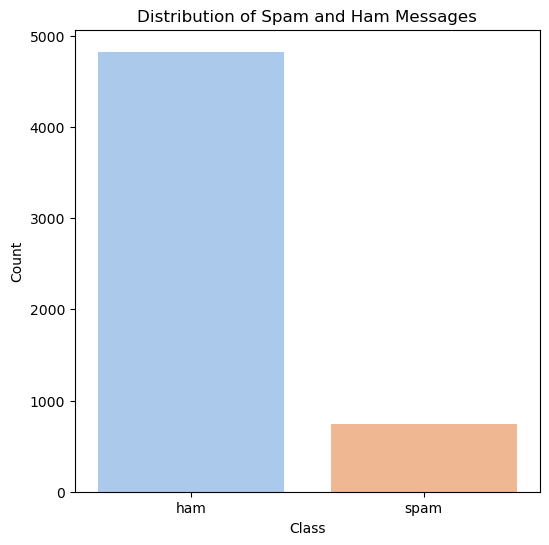

In [9]:
# Plot the count of each class
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=data, palette='pastel')  
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

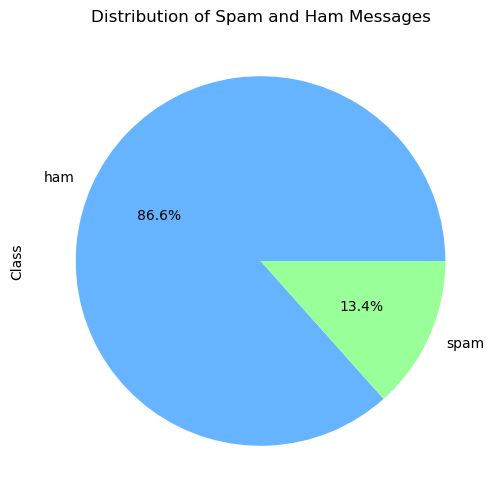

In [10]:
plt.figure(figsize=(6, 6))
data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [15]:
import re

def clean_text(text):
    if isinstance(text, str):  # Check if text is already a string
        # Remove non-alphanumeric characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    else:
        return str(text)  # Convert non-string values to string

# Example usage
data['clean_text'] = data['Message'].apply(clean_text)
data.head()


,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in a wkly comp to win FA Cup final ...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [16]:
X = data['clean_text']
y = data['Class']

In [17]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string 
ps=PorterStemmer
words=word_tokenize('clean_text')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
#define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations 
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [19]:
data['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [20]:
import string

def message_text_process(mess):
    if isinstance(mess, str):  # Check if mess is a string
        # Check characters to see if there are punctuations 
        no_punctuation = [char for char in mess if char not in string.punctuation]
        # Now form the sentence
        return ''.join(no_punctuation)
    else:
        return str(mess)  # Convert non-string values to string

# Example usage
data['clean_message'] = data['Message'].apply(message_text_process)

In [21]:
# bag of words by applying the function and fit the data(message) into it
bag_of_words_transformer=CountVectorizer(analyzer=message_text_process).fit(data['Message'])
# print the length of bag of words stored in vocabulary_attribute
print(len(bag_of_words_transformer.vocabulary_))

87


In [22]:
#store bag of words for messages using transform method
message_bagofwords=bag_of_words_transformer.transform(data['Message'])

In [23]:
#apply tfidf transformer and fit the bag of words into it(transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(message_bagofwords)

In [24]:
#print shape of tfidf
message_tfidf=tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 87)


In [25]:
# choose naive bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,data['Class'])

In [26]:
message = data['Message'][3]
bag_of_words_for_message = bag_of_words_transformer.transform([message])
tfidf = tfidf_transformer.transform(bag_of_words_for_message)

predicted_class = spam_detection_model.predict(tfidf)[0]
result_message = f'The message is predicted as {predicted_class.upper()}.'
print(result_message)

The message is predicted as HAM.


In [27]:
!pip install scikit-plot

In [28]:
#importing PCA for the dimensionality reduction 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
#function for the model building and prediction
def Model(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()

    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)

# Model Building

### 1. Logistic Regression
### 2. KNeighborsClassifier
### 3. SVM
### 4. Naive Bayes
### 5. DECISION TREE CLASSIFIER
### 6. RandomForestClassifier

## 1. Logistic Regression

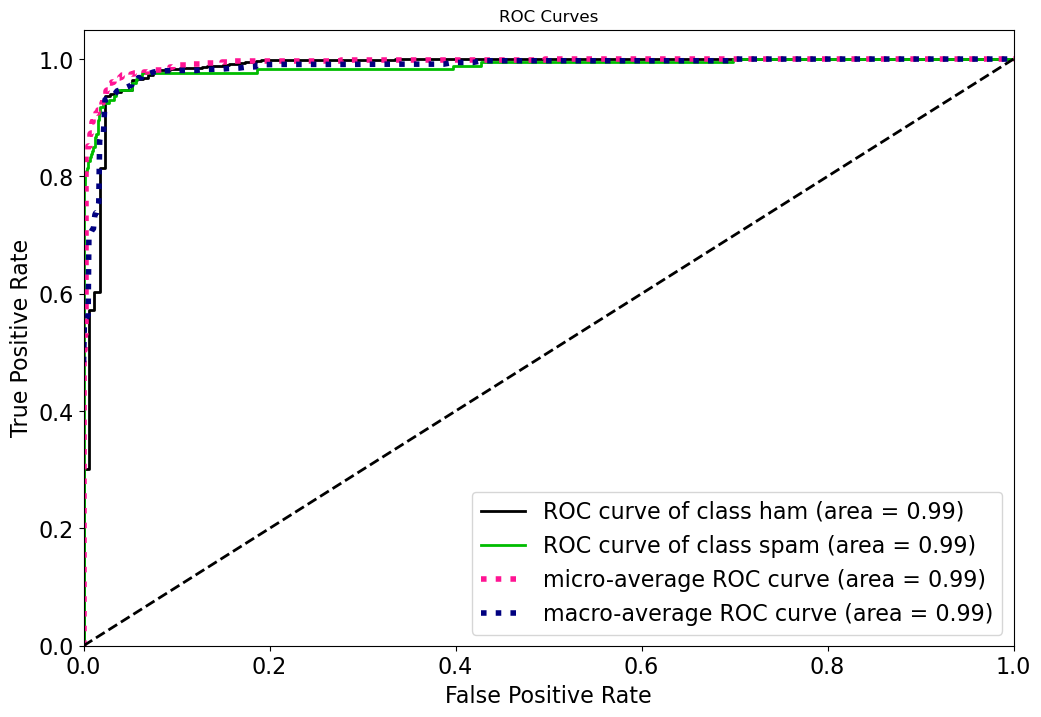

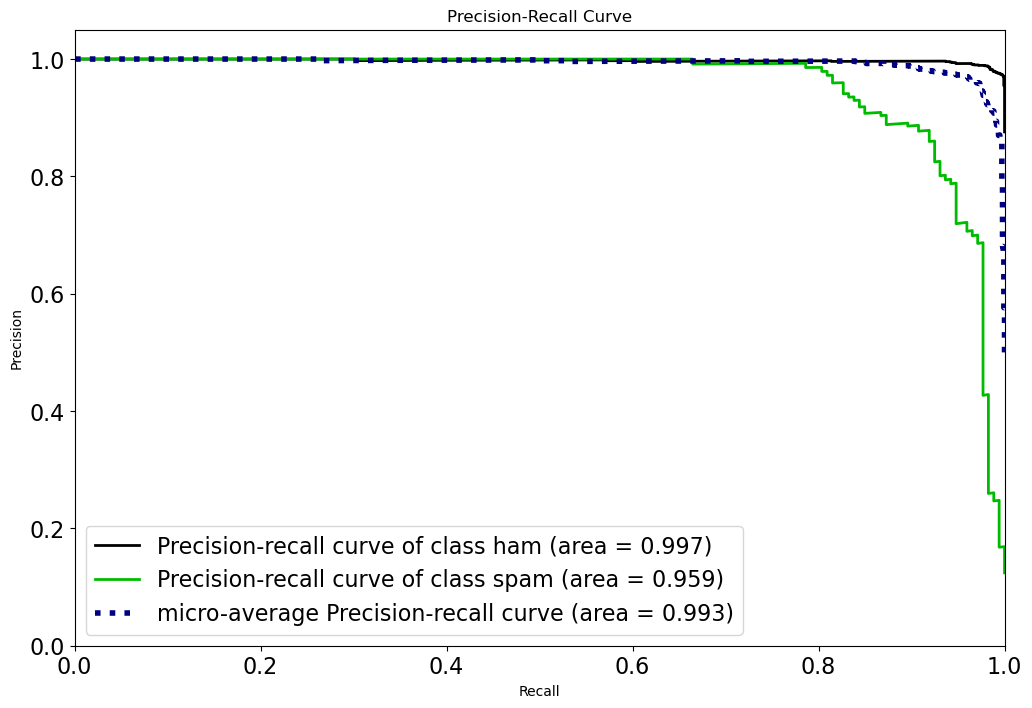

Confusion Matrix:
 [[1219    1]
 [  50  123]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       0.99      0.71      0.83       173

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.33883704235463
Training Score:
 97.05671213208902


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)

## 2. KNeighborsClassifier

## 3. SVM

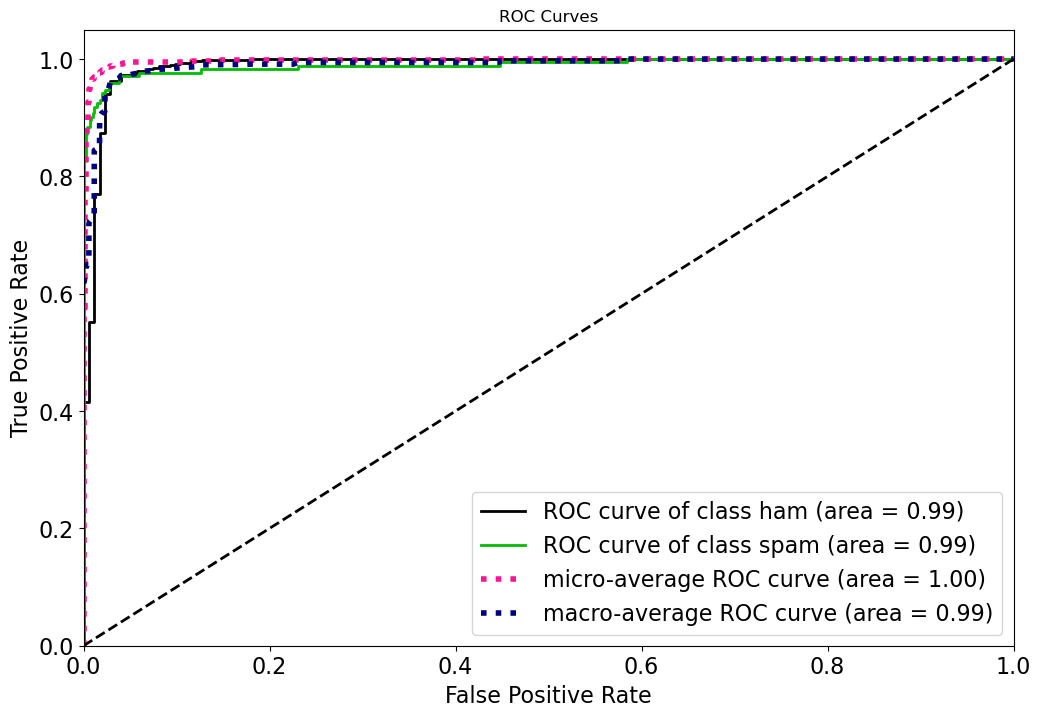

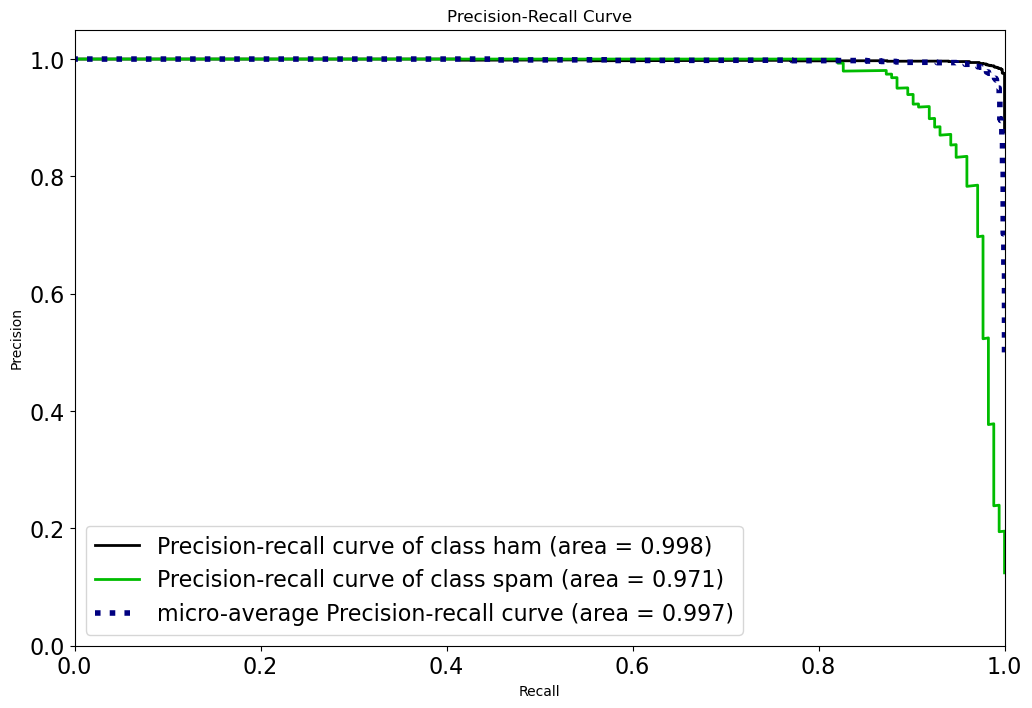

Confusion Matrix:
 [[1217    3]
 [  28  145]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       0.98      0.84      0.90       173

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 97.77458722182341
Training Score:
 99.66499162479062


In [31]:
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, X, y)

## 4. Naive Bayes

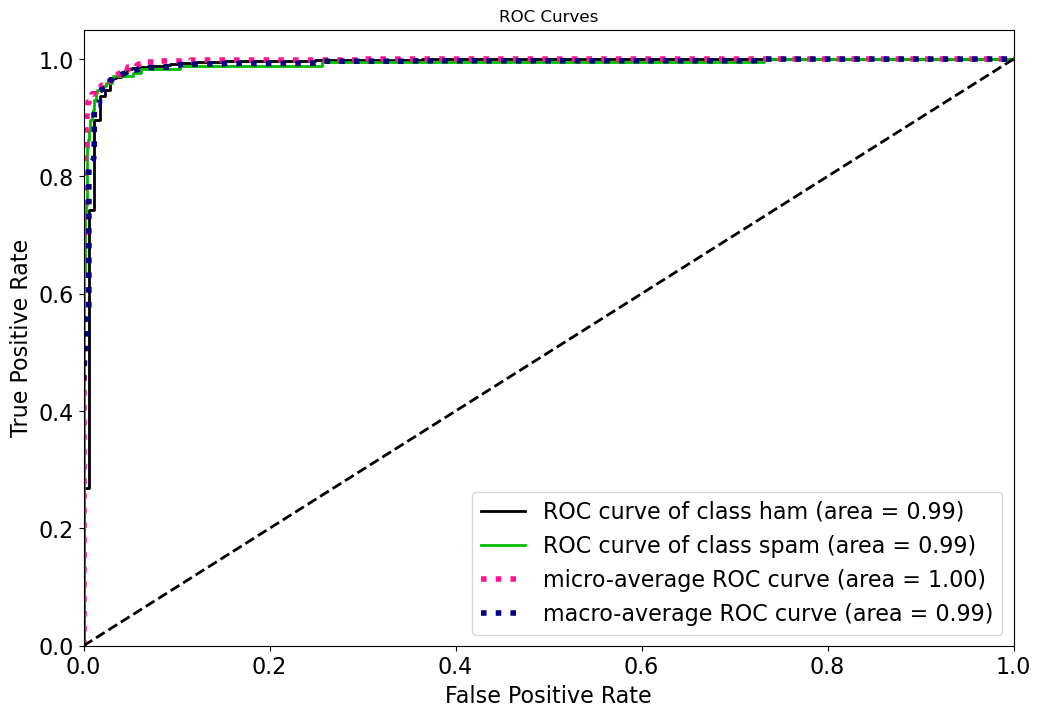

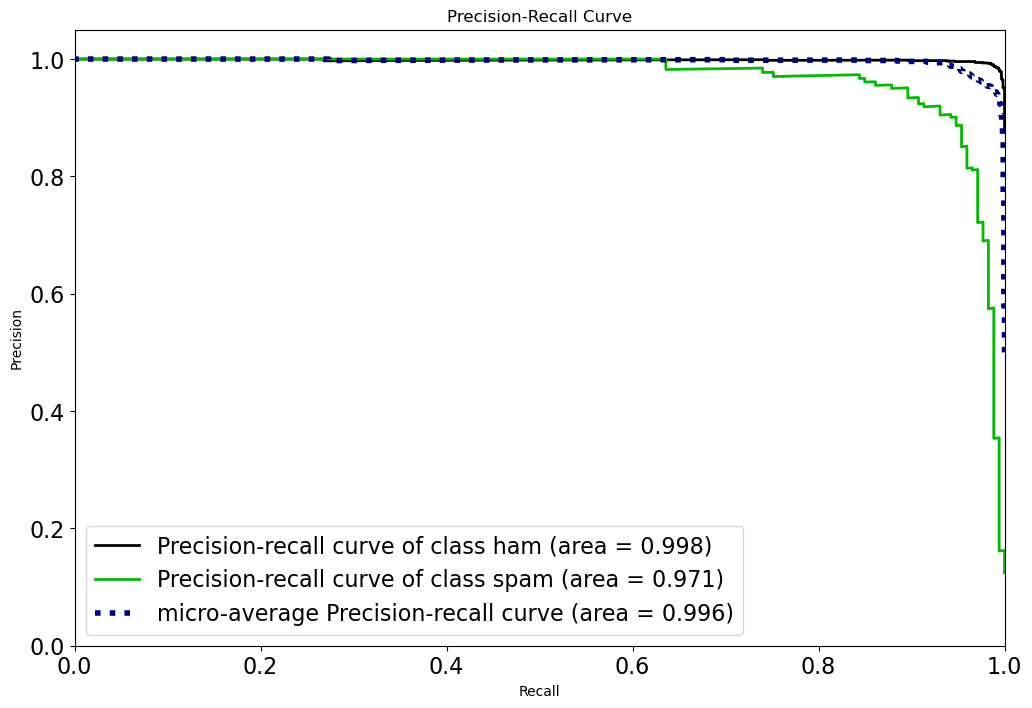

Confusion Matrix:
 [[1216    4]
 [  42  131]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.97      0.76      0.85       173

    accuracy                           0.97      1393
   macro avg       0.97      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 96.69777458722182
Training Score:
 98.61210815984685


In [32]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, X, y)

## 5. DECISION TREE CLASSIFIER

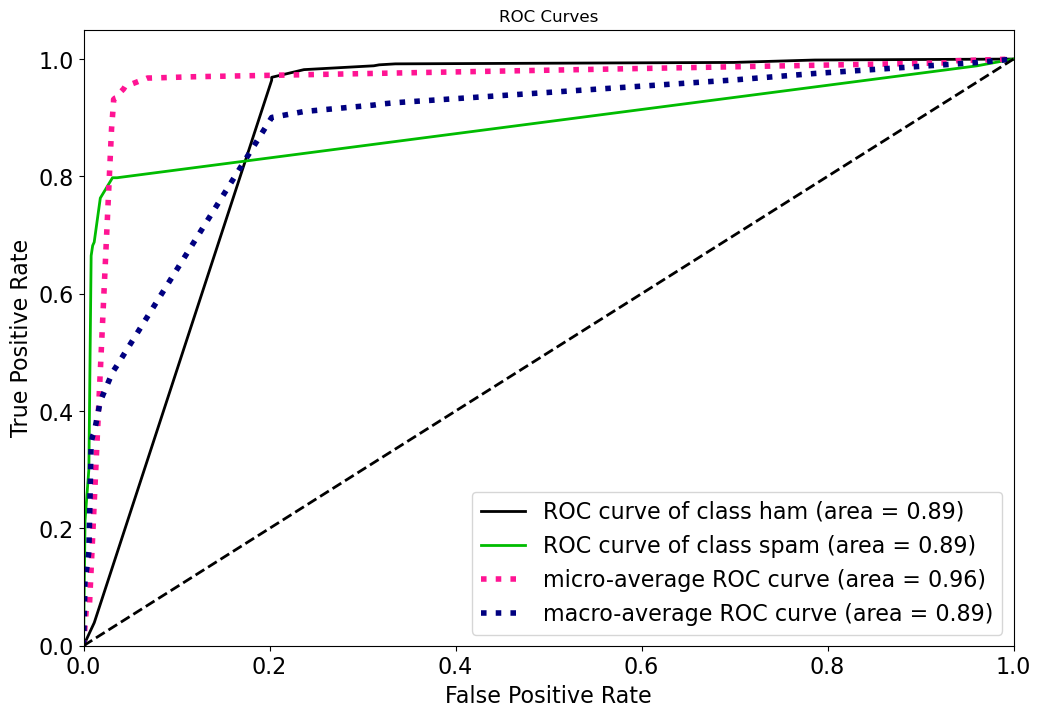

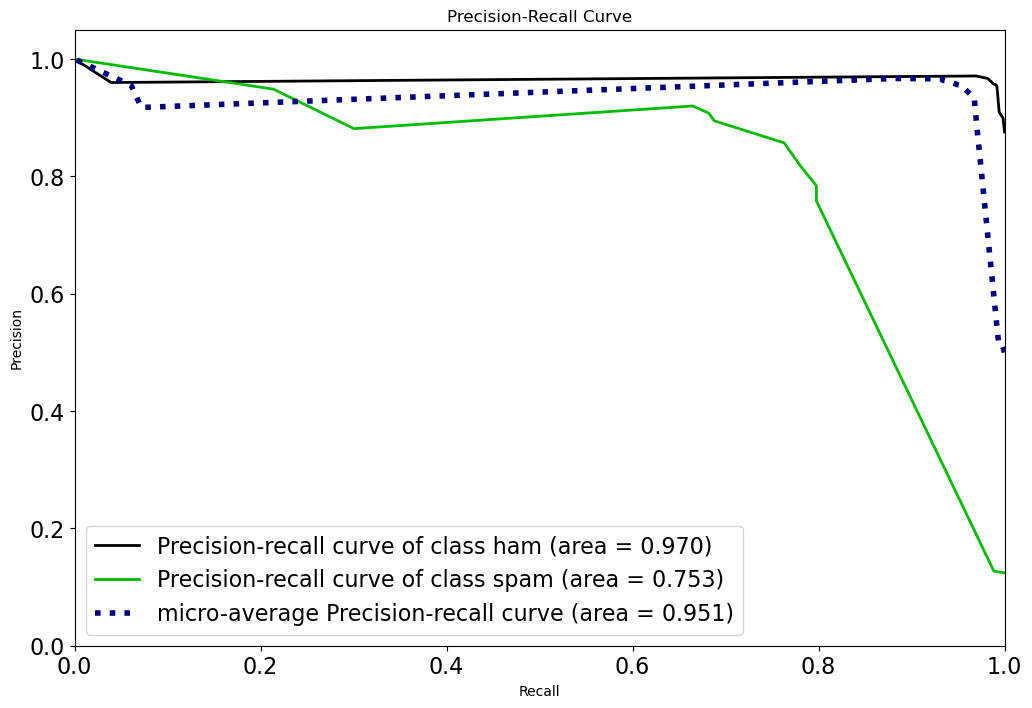

Confusion Matrix:
 [[1198   22]
 [  41  132]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      0.98      0.97      1220
        spam       0.86      0.76      0.81       173

    accuracy                           0.95      1393
   macro avg       0.91      0.87      0.89      1393
weighted avg       0.95      0.95      0.95      1393

Accuracy: 95.47738693467338
Training Score:
 96.17133285474993


In [33]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)

## 6. RandomForestClassifier

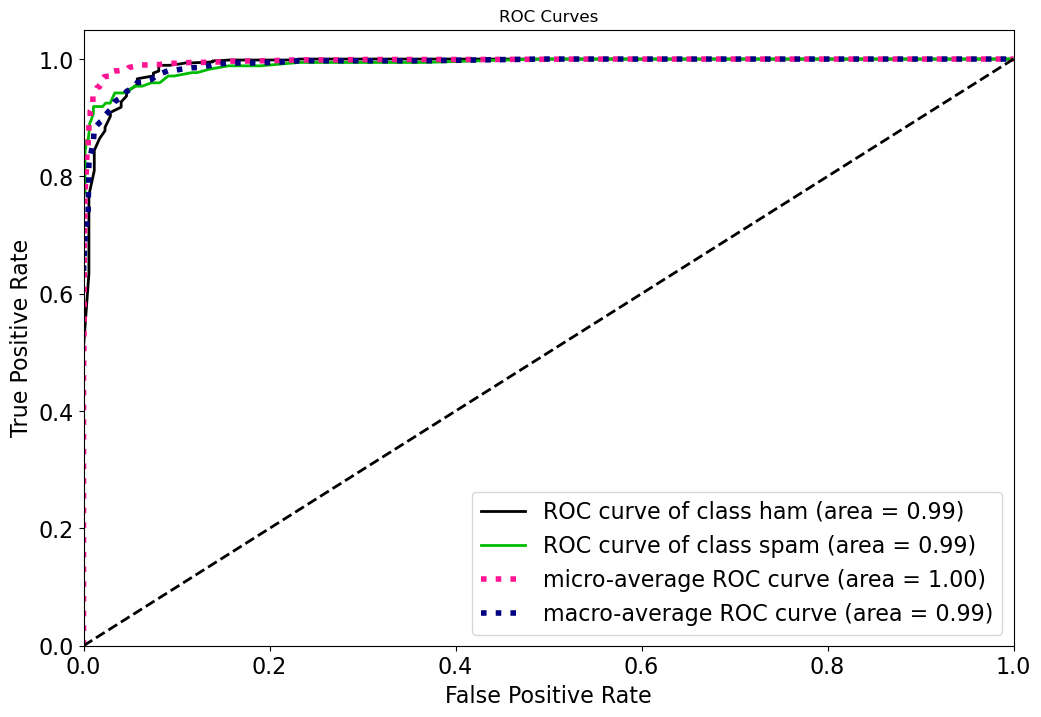

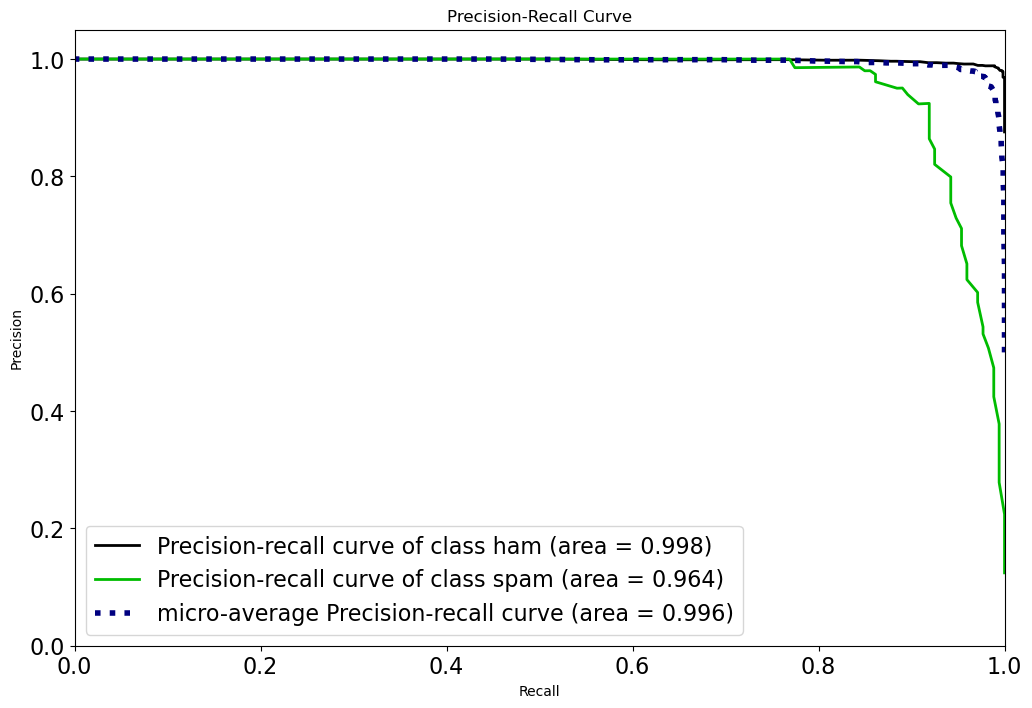

Confusion Matrix:
 [[1218    2]
 [  39  134]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.99      0.77      0.87       173

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 97.05671213208902
Training Score:
 100.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)

 We get a good accuracy score of 98 % using, Random Forest and SVM.